In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 0. 데이터 환경설정 및 데이터 정리

In [1]:
!pip install JPype1


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install konlpy


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from transformers import AutoModel, AutoTokenizer
from tqdm import tqdm

c:\Users\HOME\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv("/content/drive/MyDrive/DScover/2024_2 DScover 메인프로젝트/241129_전처리.csv")
df.fillna("내용 없음", inplace = True)

## 1. 한글 텍스트 전처리

In [6]:
EDA = df.copy()
EDA.drop(columns = ["원제목"], inplace = True)
EDA.head()

,제목,평점,좋아요수,댓글수,연관콘텐츠,장르,작가,출판사,연령제한,줄거리,총회차수,청불여부,줄거리_길이
0,천둥새,8.1,28,82,No,현판,황규영,글쓰는 사람들,전체 이용가,개인용 첨단장비 개발의 권위자 차준혁. 첫사랑을 구하기 위해 히어로가 된다. 무기가...,2,0,107
1,미친 재능의 B급 용병,6.5,9,32,No,판타지,우어나,KW북스,전체 이용가,재능이 없으면 굴러라! 인생의 메인 퀘스트의 보상은 ‘죽음’이리라. 무능력한 자...,7,0,89
2,십왕결,7.1,11,9,No,무협,이광주,에피루스,12세 이용가,에피루스 베스트 무협 소설! 전설적인 무신 염백우라는 사람이 온갖 귀한 것들만 모...,5,0,862
3,20살 서툰 유혹,7.7,14,23,No,로맨스,임은정(아사렐라),로맨스토리(북큐브 제공),청소년 이용불가,<강추!>매사에 긍정적인 밝은 성격과 재벌집 아가씨답지 않은 소박함을 가진 스무 살...,1,1,808
4,플레이 레이디,8.1,15,2,No,로맨스,박선경,라떼북,청소년 이용불가,"원나잇은 OK, 사랑은 NO! 유학 시절 지고지순하게 사랑했던 남자에게 배신당한 ...",2,1,536


In [7]:
stop_words_df = pd.read_csv("/content/drive/MyDrive/DScover/2024_2 DScover 메인프로젝트/stopwords.csv")
stop_words = stop_words_df.iloc[:, 0].tolist()
print(stop_words)

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '쪽으로', '틈타', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어서 말하면', '바꾸어서 한다면', '만약', '그렇

In [8]:
def preprocess_korean_text(text, stop_words_korean):
    okt = Okt()
    words = okt.nouns(text)
    words = [word for word in words if word not in stop_words_korean]

    return " ".join(words)

In [9]:
EDA['summary_cleaned'] = EDA['줄거리'].apply(lambda x: preprocess_korean_text(x, stop_words))
print(EDA[['줄거리', 'summary_cleaned']].head())

                                                 줄거리  \
0  개인용 첨단장비 개발의 권위자 차준혁. 첫사랑을 구하기 위해 히어로가 된다. 무기가...   
1  재능이 없으면 굴러라!  인생의 메인 퀘스트의 보상은 ‘죽음’이리라.  무능력한 자...   
2  에피루스 베스트 무협 소설!  전설적인 무신 염백우라는 사람이 온갖 귀한 것들만 모...   
3  <강추!>매사에 긍정적인 밝은 성격과 재벌집 아가씨답지 않은 소박함을 가진 스무 살...   
4  원나잇은 OK, 사랑은 NO!  유학 시절 지고지순하게 사랑했던 남자에게 배신당한 ...   

                                     summary_cleaned  
0  개인 용 첨단 장비 개발 권위자 차 준혁 첫사랑 위해 히어로 무기 악당 상대 자비 ...  
1            재능 인생 메인 퀘스트 보상 죽음 리라 저주 급 용병 회귀 터 무니 힘  
2  에피루스 베스트 무협 소설 전설 무신 염 사람 온갖 열 개 채 천하 법문 사람 열 ...  
3  강추 매사 긍정 성격 재벌 집 아가씨 답지 스무 살 매력 아가씨 유 혜빈 상처 표범...  
4  나잇 사랑 유학 시절 지고 사랑 남자에게 배신 차 혜림 그녀 마음 주지 사랑 나잇 ...  


In [10]:
# 제목은 자연어처리하니까 제대로 처리가 안 되는 것 같음 !
# 제목 부분은 자연어처리 안 하고 사용할게요
EDA['title_cleaned'] = EDA['제목'].apply(lambda x: preprocess_korean_text(x, stop_words))
print(EDA[['제목', 'title_cleaned']].head())

             제목 title_cleaned
0           천둥새           천둥새
1  미친 재능의 B급 용병       재능 급 용병
2           십왕결          십왕 결
3     20살 서툰 유혹          살 유혹
4       플레이 레이디       플레이 레이디


In [11]:
summary = EDA["summary_cleaned"]
summary.tolist()
print(summary)

0        개인 용 첨단 장비 개발 권위자 차 준혁 첫사랑 위해 히어로 무기 악당 상대 자비 ...
1                  재능 인생 메인 퀘스트 보상 죽음 리라 저주 급 용병 회귀 터 무니 힘
2        에피루스 베스트 무협 소설 전설 무신 염 사람 온갖 열 개 채 천하 법문 사람 열 ...
3        강추 매사 긍정 성격 재벌 집 아가씨 답지 스무 살 매력 아가씨 유 혜빈 상처 표범...
4        나잇 사랑 유학 시절 지고 사랑 남자에게 배신 차 혜림 그녀 마음 주지 사랑 나잇 ...
                               ...                        
13074    유진산 퓨전 무협 장편소설 철자 검 철자 검 속 비밀 두 사람 행보 사부 정신 제자...
13075    역사 동북아시아 강 조선 이야기 병자호란 패전 조선 우연 기회 조선 표류 서양인 하...
13076    돈 게 거 더 다시 널 사람 위해 희생 여자 수인 그녀 향 소유 욕 남자 태 그녀 ...
13077    거대 행성 충돌 지구 두 개 세계 공존 시작 몬스터 출현 가디언 각성 모든 기억 몬...
13078    화산 대사 진자 강 파문 제자 침 삼류 검 천하 제일 검 사부 말 가슴 채 사제 사...
Name: summary_cleaned, Length: 13079, dtype: object


In [12]:
title = EDA["제목"]
title.tolist()
print(title)

0                 천둥새
1        미친 재능의 B급 용병
2                 십왕결
3           20살 서툰 유혹
4             플레이 레이디
             ...     
13074             철자검
13075          봉황의 비상
13076          예뻐 죽겠다
13077         인페르노 로드
13078           천하제일검
Name: 제목, Length: 13079, dtype: object


## 2. Kobert Embedding
- PCA 결과 이후의 df는 df_reduced로 변수명 사용
- 클러스터링 결과 (호진 오빠 클러스터링 코드) 이후의 df는 df_cluster로 변수명 사용

In [15]:
pip install sentencepiece


   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   ------- -------------------------------- 174.1/991.5 kB 5.3 MB/s eta 0:00:01
   ------------- -------------------------- 337.9/991.5 kB 3.5 MB/s eta 0:00:01
   --------------------- ------------------ 522.2/991.5 kB 3.3 MB/s eta 0:00:01
   --------------------------- ------------ 686.1/991.5 kB 3.1 MB/s eta 0:00:01
   ------------------------------------ --- 901.1/991.5 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------  983.0/991.5 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 991.5/991.5 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
model = AutoModel.from_pretrained("monologg/kobert")
tokenizer = AutoTokenizer.from_pretrained("monologg/kobert", trust_remote_code=True)

In [17]:
from tqdm import tqdm

def embed_sentences(sentences, model, tokenizer, device="cuda", method="cls"):
    # 모델을 지정한 디바이스로 이동
    model = model.to(device)
    model.eval()

    # 입력 문장을 토큰화
    tokenized = tokenizer(
        sentences,
        padding=True,
        truncation=True,
        max_length=256,
        return_tensors="pt"
    ).to(device)  # 토큰화된 데이터를 지정한 디바이스로 이동

    # 모델에서 출력 얻기
    with torch.no_grad():
        outputs = model(**tokenized)
        hidden_states = outputs.last_hidden_state  # (N x seq_len x hidden_size)

    # 문장 벡터 추출
    if method == "cls":
        # [CLS] 토큰의 벡터 사용 (첫 번째 토큰)
        sentence_embeddings = hidden_states[:, 0, :]  # (N x hidden_size)
    elif method == "mean":
        # 패딩되지 않은 토큰 벡터의 평균값 사용
        attention_mask = tokenized["attention_mask"]  # (N x seq_len)
        expanded_mask = attention_mask.unsqueeze(-1).expand(hidden_states.size())
        sum_hidden_states = torch.sum(hidden_states * expanded_mask, dim=1)
        sum_mask = torch.sum(attention_mask, dim=1).unsqueeze(-1)
        sentence_embeddings = sum_hidden_states / sum_mask  # (N x hidden_size)
    else:
        raise ValueError("method must be either 'cls' or 'mean'")

    return sentence_embeddings

device = "cuda" if torch.cuda.is_available() else "cpu"

embeddings_summary = torch.empty((0, 768)).to(device)
embeddings_title = torch.empty((0, 768)).to(device)

for i in tqdm(range(len(summary)), desc="Summary Embedding Progress"):
    embedded = embed_sentences([summary[i]], model, tokenizer, device=device, method="cls")
    embeddings_summary = torch.cat((embeddings_summary, embedded), dim=0)

for i in tqdm(range(len(title)), desc="Title Embedding Progress"):
    embedded = embed_sentences([title[i]], model, tokenizer, device=device, method="cls")
    embeddings_title = torch.cat((embeddings_title, embedded), dim=0)

print("임베딩 크기:", embeddings_summary.shape)  # (N x hidden_size)
print("임베딩:", embeddings_summary[0])

Title Embedding Progress: 100%|██████████| 13079/13079 [32:44<00:00,  6.66it/s]


임베딩 크기: torch.Size([13079, 768])
임베딩: tensor([ 2.7008e-01,  4.2704e-02, -1.5776e-03, -6.7789e+00,  4.1082e-01,
        -1.7569e-01, -2.2067e-01,  2.4139e-01, -1.0245e+00,  6.7304e-02,
        -8.9427e-01, -1.5271e-01, -3.5581e-01, -1.6236e-01,  7.7529e-01,
        -1.6210e-01, -4.7393e-02,  6.8641e-02, -2.7671e-01, -9.5055e-02,
        -8.5042e-02, -2.4514e-02, -4.2138e-01, -1.0048e-01, -2.9611e-01,
        -1.5249e-01, -4.4364e-02,  5.9508e-02, -2.5495e-01,  1.1665e-01,
         9.5065e-04, -3.8244e-03, -3.2261e-01,  2.1265e-02, -3.6154e-03,
        -1.4598e-01,  7.3354e-01,  1.2845e-01, -1.4633e-01, -2.6130e-02,
         7.0161e-01, -2.5509e-02, -2.8388e-01, -3.8062e-01, -8.8103e-02,
         7.8009e-02, -1.2193e-01,  3.6515e-01,  6.1285e-02,  1.6922e-01,
         1.7823e-01,  3.1314e-01, -2.8812e-01,  1.4427e-02,  3.9165e-01,
         9.7245e-02,  8.0381e-02, -2.8387e-01, -2.7454e-01, -5.7877e-02,
         2.6697e-01,  2.8867e-01, -9.2117e-02, -6.4764e-02,  2.3790e-01,
        -1.41

### PCA

In [18]:
embeddings_summary_cpu = embeddings_summary.cpu().detach().numpy()
embeddings_title_cpu = embeddings_title.cpu().detach().numpy()

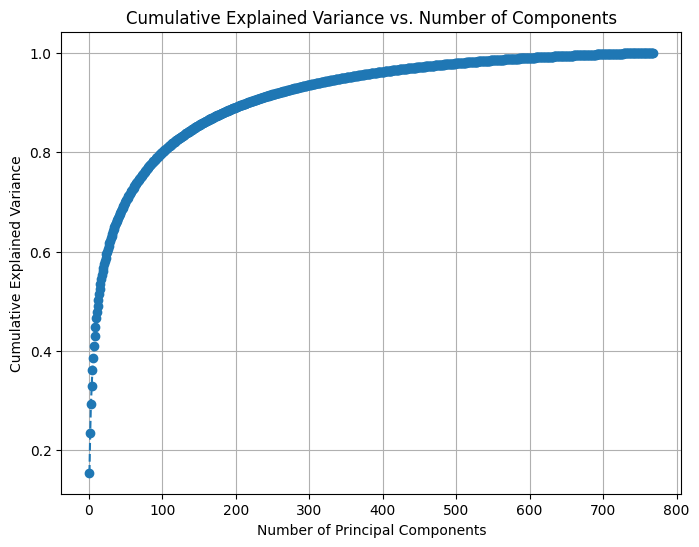

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 모델 정의
pca = PCA()

# PCA 모델을 데이터에 적용하여 주성분 계산
pca.fit(embeddings_summary_cpu)

# 각 주성분의 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 분산 비율
cumulative_variance = explained_variance_ratio.cumsum()

# 누적 분산 비율 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [26]:
threshold = 0.9
n_components = next(i for i, total in enumerate(cumulative_variance) if total >= threshold) + 1

print(f"선택된 차원 수: {n_components}")

선택된 차원 수: 228


In [27]:
pca = PCA(n_components=n_components)
reduced_embeddings_summary = pca.fit_transform(embeddings_summary_cpu)
print(f"Reduced embeddings shape: {reduced_embeddings_summary.shape}")

Reduced embeddings shape: (13079, 228)


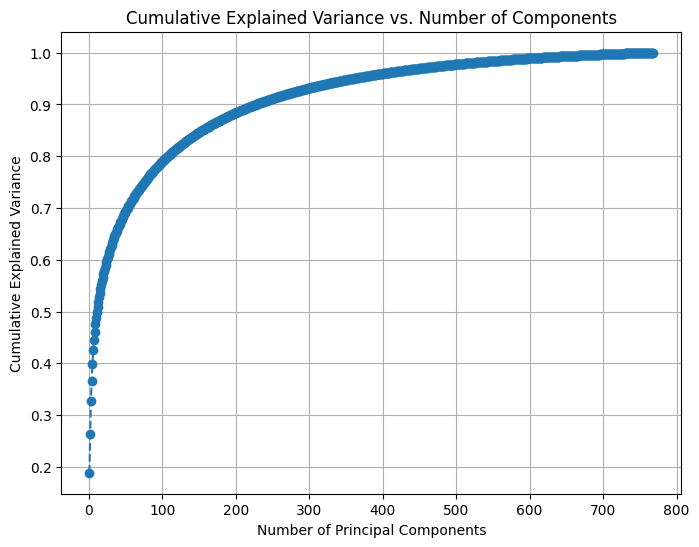

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 모델 정의
pca = PCA()

# PCA 모델을 데이터에 적용하여 주성분 계산
pca.fit(embeddings_title_cpu)

# 각 주성분의 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 분산 비율
cumulative_variance = explained_variance_ratio.cumsum()

# 누적 분산 비율 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [23]:
threshold = 0.9
n_components = next(i for i, total in enumerate(cumulative_variance) if total >= threshold) + 1
print(f"선택된 차원 수: {n_components}")

선택된 차원 수: 228


In [24]:
pca_title = PCA(n_components=n_components)
reduced_embeddings_title = pca_title.fit_transform(embeddings_title_cpu)
print(f"Reduced title embeddings shape: {reduced_embeddings_title.shape}")

Reduced title embeddings shape: (13079, 228)


In [121]:
reduced_embeddings_df = pd.DataFrame(reduced_embeddings_summary)
reduced_embeddings_title_df = pd.DataFrame(reduced_embeddings_title)

n_summary_cols = reduced_embeddings_summary.shape[1]
n_title_cols = reduced_embeddings_title.shape[1]

summary_columns = [f'summary_{i+1}' for i in range(n_summary_cols)]
title_columns = [f'title_{i+1}' for i in range(n_title_cols)]

reduced_embeddings_summary_df = pd.DataFrame(reduced_embeddings_summary, columns=summary_columns)
reduced_embeddings_title_df = pd.DataFrame(reduced_embeddings_title, columns=title_columns)

df_reduced = pd.concat([df, reduced_embeddings_summary_df, reduced_embeddings_title_df], axis=1)
df_reduced.head()

,제목,평점,좋아요수,댓글수,연관콘텐츠,장르,작가,출판사,연령제한,줄거리,...,title_28,title_29,title_30,title_31,title_32,title_33,title_34,title_35,title_36,title_37
0,천둥새,8.1,28,82,No,현판,황규영,글쓰는 사람들,전체 이용가,개인용 첨단장비 개발의 권위자 차준혁. 첫사랑을 구하기 위해 히어로가 된다. 무기가...,...,-0.000206,0.003783,0.002024,-0.004504,-0.002369,-0.000194,0.001767,0.001388,-0.001521,0.000051
1,미친 재능의 B급 용병,6.5,9,32,No,판타지,우어나,KW북스,전체 이용가,재능이 없으면 굴러라! 인생의 메인 퀘스트의 보상은 ‘죽음’이리라. 무능력한 자...,...,0.099802,-0.115421,-0.203381,-0.008300,-0.175139,-0.210924,-0.071017,-0.102316,0.204566,0.050371
2,십왕결,7.1,11,9,No,무협,이광주,에피루스,12세 이용가,에피루스 베스트 무협 소설! 전설적인 무신 염백우라는 사람이 온갖 귀한 것들만 모...,...,0.000300,0.003305,0.001693,-0.004146,-0.002838,-0.000279,0.001605,0.001129,-0.001900,0.000266
3,20살 서툰 유혹,7.7,14,23,No,로맨스,임은정(아사렐라),로맨스토리(북큐브 제공),청소년 이용불가,<강추!>매사에 긍정적인 밝은 성격과 재벌집 아가씨답지 않은 소박함을 가진 스무 살...,...,0.009249,0.039479,0.029103,-0.031071,0.057574,-0.013194,0.057002,0.014352,-0.037614,-0.011150
4,플레이 레이디,8.1,15,2,No,로맨스,박선경,라떼북,청소년 이용불가,"원나잇은 OK, 사랑은 NO! 유학 시절 지고지순하게 사랑했던 남자에게 배신당한 ...",...,-0.152702,0.201908,-0.389007,-0.138123,-0.245387,-0.186452,0.266313,0.016061,-0.322499,-0.228668


In [122]:
df_reduced.drop(columns = ['줄거리','제목'], inplace = True)
df_reduced.head()

,평점,좋아요수,댓글수,연관콘텐츠,장르,작가,출판사,연령제한,총회차수,청불여부,...,title_28,title_29,title_30,title_31,title_32,title_33,title_34,title_35,title_36,title_37
0,8.1,28,82,No,현판,황규영,글쓰는 사람들,전체 이용가,2,0,...,-0.000206,0.003783,0.002024,-0.004504,-0.002369,-0.000194,0.001767,0.001388,-0.001521,0.000051
1,6.5,9,32,No,판타지,우어나,KW북스,전체 이용가,7,0,...,0.099802,-0.115421,-0.203381,-0.008300,-0.175139,-0.210924,-0.071017,-0.102316,0.204566,0.050371
2,7.1,11,9,No,무협,이광주,에피루스,12세 이용가,5,0,...,0.000300,0.003305,0.001693,-0.004146,-0.002838,-0.000279,0.001605,0.001129,-0.001900,0.000266
3,7.7,14,23,No,로맨스,임은정(아사렐라),로맨스토리(북큐브 제공),청소년 이용불가,1,1,...,0.009249,0.039479,0.029103,-0.031071,0.057574,-0.013194,0.057002,0.014352,-0.037614,-0.011150
4,8.1,15,2,No,로맨스,박선경,라떼북,청소년 이용불가,2,1,...,-0.152702,0.201908,-0.389007,-0.138123,-0.245387,-0.186452,0.266313,0.016061,-0.322499,-0.228668


### 클러스터링

클러스터링:   0%|          | 0/49 [00:00<?, ?it/s]c:\Users\HOME\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HOME\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\HOME\anaconda3\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\HOME\anaconda3\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\HOME\anaconda3\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
클러스터링: 100%|██████████| 49/49 

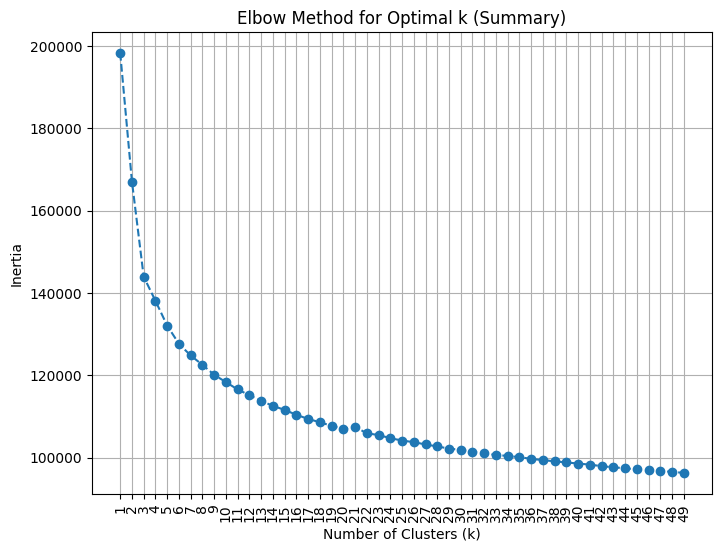

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 임베딩 데이터 (예시: embeddings)
embeddings_np_summary = embeddings_summary.cpu().numpy()  # GPU에서 CPU로 이동 (필요 시)

# 클러스터 개수 범위 설정
cluster_range = range(1, 50)
inertia_values = []

# 각 클러스터 개수에 대해 K-means 실행
for k in tqdm(cluster_range, desc = "클러스터링"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings_np_summary)
    inertia_values.append(kmeans.inertia_)  # 관성 값 저장

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Summary)')
plt.xticks(cluster_range, rotation = 90)
plt.grid()
plt.show()

클러스터링: 100%|██████████| 49/49 [02:33<00:00,  3.13s/it]


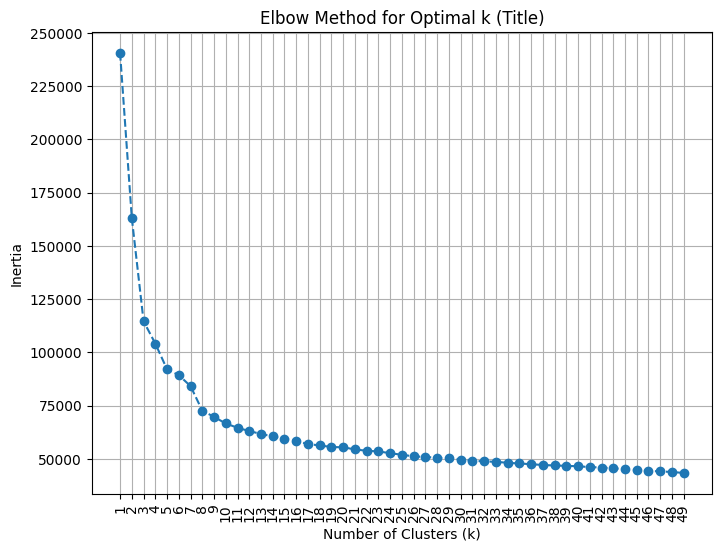

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 임베딩 데이터 (예시: embeddings)
embeddings_np_title = embeddings_title.cpu().numpy()  # GPU에서 CPU로 이동 (필요 시)

# 클러스터 개수 범위 설정
cluster_range = range(1, 50)
inertia_values = []

# 각 클러스터 개수에 대해 K-means 실행
for k in tqdm(cluster_range, desc = "클러스터링"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings_np_title)
    inertia_values.append(kmeans.inertia_)  # 관성 값 저장

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Title)')
plt.xticks(cluster_range, rotation = 90)
plt.grid()
plt.show()

In [28]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters_summary = kmeans.fit_predict(embeddings_np_summary)

In [29]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters_title = kmeans.fit_predict(embeddings_np_title)

In [149]:
df_cluster = df.copy()

In [150]:
df_cluster['줄거리'] = clusters_summary
df_cluster['제목'] = clusters_title

EDA['줄거리'] = clusters_summary
EDA['제목'] = clusters_title

### 상관계수

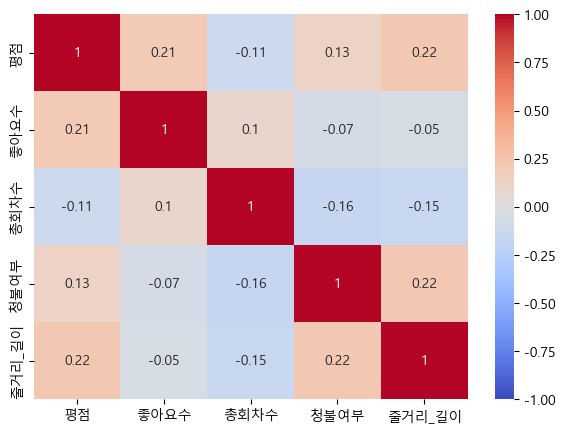

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 폰트 이름
plt.rcParams['axes.unicode_minus'] = False
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr().round(2)
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.show()

## 3. 모델

### PCA 이후 모델

In [123]:
from sklearn.preprocessing import LabelEncoder

cats = ['장르', '작가','출판사', '연령제한', '연관콘텐츠']
label_encoder = LabelEncoder()

# '장르', '작가', '출판사' 열에 대해 인코딩
for col in cats:
    df_reduced[col + '_encoded'] = label_encoder.fit_transform(df_reduced[col])

In [124]:
df_reduced.drop(columns = cats, inplace = True)
df_reduced.drop(columns = ["원제목"], inplace = True)

In [125]:
df_comment = np.array([float(item.replace(',', '')) for item in df['댓글수']])
df_reduced['댓글수'] = df_comment

In [126]:
df_reduced['평점'] = (df_reduced['평점'] >= 7.5).astype(int)

In [129]:
df_reduced.describe()

,평점,좋아요수,댓글수,총회차수,청불여부,줄거리_길이,summary_1,summary_2,summary_3,summary_4,...,title_33,title_34,title_35,title_36,title_37,장르_encoded,작가_encoded,출판사_encoded,연령제한_encoded,연관콘텐츠_encoded
count,13079.000000,13079.000000,13079.000000,13079.000000,13079.000000,13079.000000,1.307900e+04,13079.000000,1.307900e+04,1.307900e+04,...,13079.000000,13079.000000,13079.000000,1.307900e+04,13079.000000,13079.000000,13079.000000,13079.00000,13079.000000,13079.000000
mean,0.569080,24.095802,55.519994,4.785152,0.220200,324.039988,-4.293321e-07,-0.000001,2.277910e-07,1.117080e-07,...,-0.000011,0.000010,-0.000006,-3.158741e-07,0.000014,3.437342,2587.255830,235.80289,1.999388,0.001682
std,0.495224,68.159280,525.793328,10.080947,0.414397,223.008717,1.760434e+00,1.699341,7.816727e-01,7.651143e-01,...,0.187041,0.179544,0.177427,1.754437e-01,0.172013,1.881820,1428.304315,144.17340,0.725942,0.056645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.448908e+00,-4.026399,-2.182168e+00,-2.742000e+00,...,-1.247798,-1.300145,-1.127383,-1.090152e+00,-1.131201,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,1.000000,0.000000,166.000000,-1.557739e+00,-1.303263,-5.324300e-01,-5.036473e-01,...,-0.000353,-0.007245,0.001172,-1.953011e-03,-0.000211,2.000000,1402.500000,144.00000,2.000000,0.000000
50%,1.000000,7.000000,6.000000,3.000000,0.000000,257.000000,-1.208192e-01,-0.239247,-8.649370e-02,-1.476959e-02,...,-0.000353,0.001724,0.002118,-1.953011e-03,-0.000211,2.000000,2581.000000,193.00000,2.000000,0.000000
75%,1.000000,18.000000,16.000000,6.000000,0.000000,424.000000,1.550281e+00,1.104623,4.180367e-01,4.894562e-01,...,0.008737,0.001724,0.002118,2.597208e-03,0.002051,6.000000,3796.000000,346.00000,2.000000,0.000000
max,1.000000,990.000000,19482.000000,319.000000,1.000000,1601.000000,4.053498e+00,4.519026,4.880564e+00,3.500963e+00,...,1.261694,1.411855,1.276423,1.350625e+00,1.332278,7.000000,5092.000000,537.00000,3.000000,3.000000


In [134]:
from sklearn.model_selection import train_test_split

# X와 y를 분리한 뒤 DataFrame 형태로 유지
y = df_reduced["평점"] 
X = df_reduced.drop(columns=["평점"])

# DataFrame 형태로 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
from sklearn.preprocessing import StandardScaler

# 1) StandardScaler 객체 생성
columns_to_scale = ['좋아요수', '댓글수', '총회차수', '청불여부', '줄거리_길이']

# 1. StandardScaler 초기화
scaler = StandardScaler()

# 2. 원하는 컬럼만 스케일링
scaled_values = scaler.fit_transform(X_train[columns_to_scale])

# 3. DataFrame으로 변환 후 기존 DataFrame에 병합
X_train[columns_to_scale] = scaled_values

print(X_train)

           좋아요수       댓글수      총회차수      청불여부    줄거리_길이  summary_1  summary_2  \
6822  -0.293492 -0.101704 -0.076765 -0.527407 -0.549388   1.199083   0.130282   
8902  -0.279216 -0.101704 -0.376726  1.896070 -0.643853  -0.636496   2.622338   
10479 -0.350594  2.456712 -0.076765 -0.527407 -0.265992   2.493171  -0.673452   
11313 -0.350594 -0.107849 -0.376726 -0.527407  0.305298  -0.931264  -1.557560   
12465  0.705793  0.064214  0.323183 -0.527407 -0.198517  -0.782521   0.232077   
...         ...       ...       ...       ...       ...        ...        ...   
11964 -0.350594 -0.107849 -0.176752 -0.527407 -0.657348  -1.469618   2.864197   
5191  -0.165012 -0.093510 -0.276739 -0.527407  1.623313  -2.631790  -1.368539   
5390  -0.350594 -0.107849 -0.176752 -0.527407  0.084879   2.594969  -1.094032   
860   -0.293492 -0.089414  0.223196 -0.527407 -0.580876  -1.057680   1.978932   
7270  -0.336318 -0.105801 -0.376726  1.896070  1.236455  -2.554004   0.417397   

       summary_3  summary_4

#### XG Boost

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [139]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.5837155963302753


#### 하이퍼 파라미터 튜닝 및 모델 성능

In [140]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'LGBMClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [-1, 10, 20]
    }
}

# 모델 인스턴스 초기화
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=0),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=0),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=0),
    'XGBClassifier': XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=0),
    'LGBMClassifier': LGBMClassifier(random_state=0, verbose=-1)
}

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
results = {}

# 모델별 Grid Search
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='accuracy',
        cv=k_fold,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    # 최적의 파라미터와 점수 저장
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_ * 100

    results[model_name] = {
        'best_params': best_params,
        'best_score': best_score
    }

    print(f"{model_name}: Best Score = {best_score:.2f}% with Params = {best_params}")

# 결과 출력
print("\nFinal Results:")
for model_name, result in results.items():
    print(f"{model_name}: Best Score = {result['best_score']:.2f}%, Best Params = {result['best_params']}")

Running GridSearchCV for RandomForestClassifier...
Fitting 10 folds for each of 27 candidates, totalling 270 fits
RandomForestClassifier: Best Score = 82.00% with Params = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Running GridSearchCV for ExtraTreesClassifier...
Fitting 10 folds for each of 27 candidates, totalling 270 fits
ExtraTreesClassifier: Best Score = 80.54% with Params = {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Running GridSearchCV for GradientBoostingClassifier...
Fitting 10 folds for each of 27 candidates, totalling 270 fits
GradientBoostingClassifier: Best Score = 82.85% with Params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Running GridSearchCV for XGBClassifier...
Fitting 10 folds for each of 27 candidates, totalling 270 fits
XGBClassifier: Best Score = 82.70% with Params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Running GridSearchCV for LGBMClassifier...
Fitting 10 folds for each of 27 cand

Training RandomForestClassifier...
Feature Importance for RandomForestClassifier:


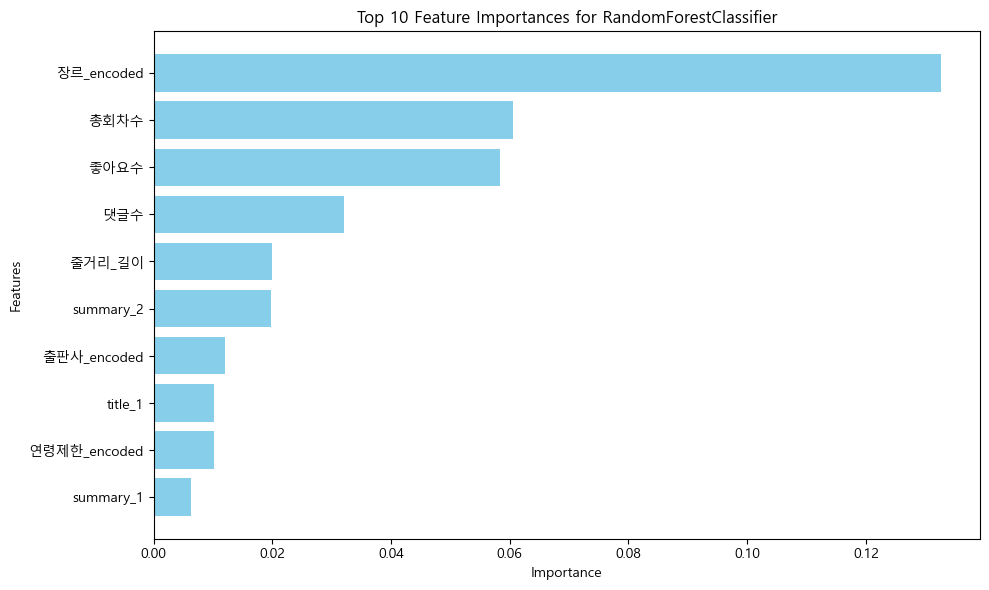

Training ExtraTreesClassifier...
Feature Importance for ExtraTreesClassifier:


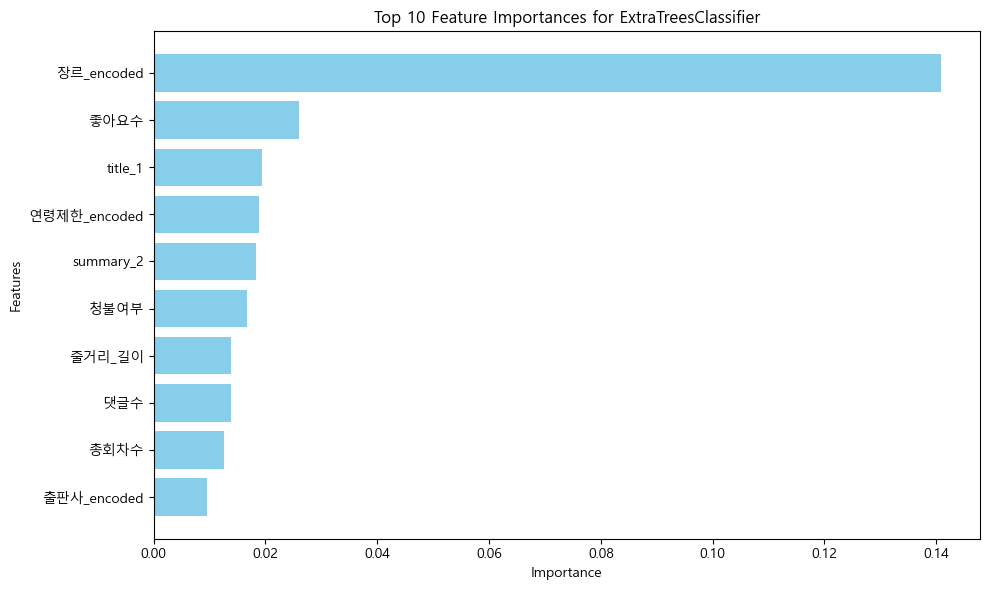

Training GradientBoostingClassifier...
Feature Importance for GradientBoostingClassifier:


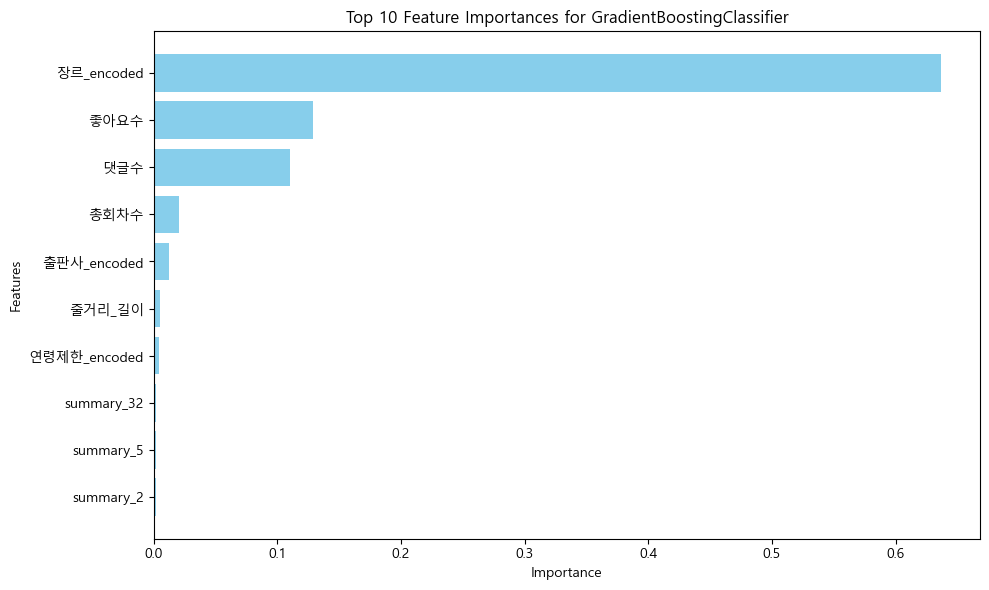

Training XGBClassifier...
Feature Importance for XGBClassifier:


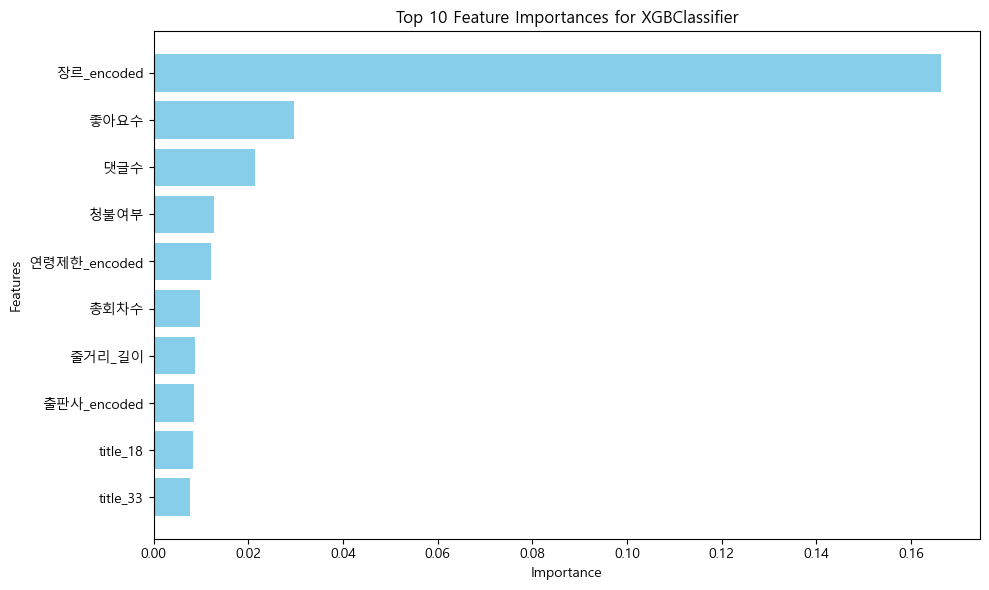

Training LGBMClassifier...
Feature Importance for LGBMClassifier:


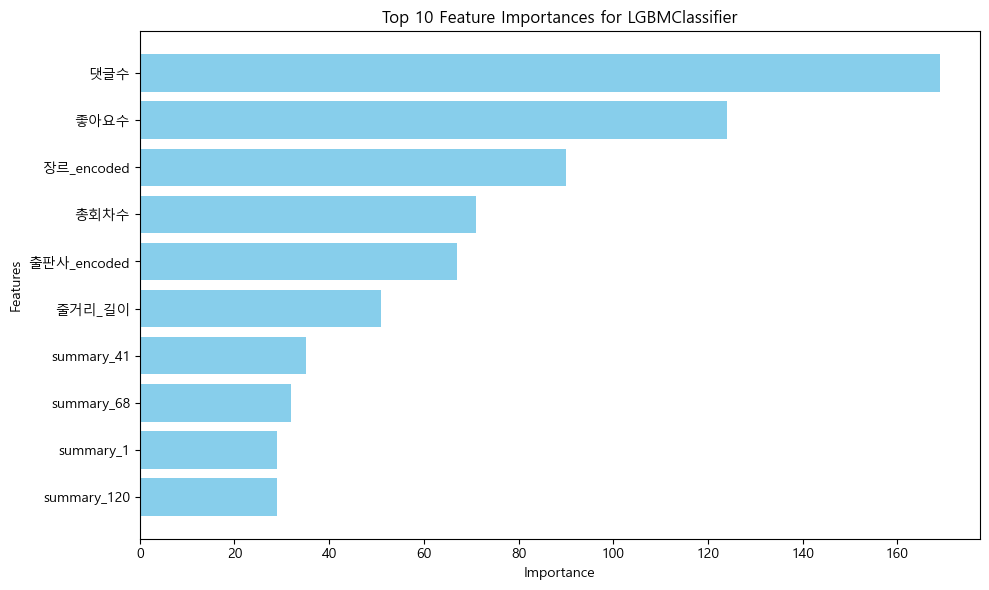

In [147]:
from matplotlib import pyplot as plt
import numpy as np

# 변수 중요도 시각화 함수 (상위 10개 특성만 출력)
def plot_top_feature_importances(model, feature_names, model_name, top_n=10):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]  # 중요도 순으로 정렬

        # 상위 top_n개 특성만 선택
        top_indices = indices[:top_n]
        top_importances = importances[top_indices]
        top_feature_names = [feature_names[i] for i in top_indices]

        plt.figure(figsize=(10, 6))
        plt.barh(top_feature_names, top_importances, align="center", color='skyblue')
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.title(f"Top {top_n} Feature Importances for {model_name}")
        plt.gca().invert_yaxis()  # 중요한 특성이 위에 오도록
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not have feature_importances_ attribute.")

# 모델 학습 및 변수 중요도 시각화 (상위 10개 특성)
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # 모델 학습

    print(f"Feature Importance for {model_name}:")
    feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]
    plot_top_feature_importances(model, feature_names, model_name)


In [ ]:
# 중복?
models = [
    random_model,
    extra_model,
    gbm_model,
    xgb_model,
    lgbm_model
]

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
results = dict()

for alg in models:
    alg.fit(X_train, y_train)
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='accuracy')
    results[alg.__class__.__name__] = np.mean(score)*100
    print(alg, results[alg.__class__.__name__])

### 클러스터링 이후 모델

In [151]:
from sklearn.preprocessing import LabelEncoder

cats = ['장르', '작가', '출판사', '연령제한', '연관콘텐츠']
label_encoder = LabelEncoder()

# '장르', '작가', '출판사' 열에 대해 인코딩
for col in cats:
    df_cluster[col + '_encoded'] = label_encoder.fit_transform(df_cluster[col])

In [152]:
df_cluster.drop(columns = cats, inplace = True)
df_cluster.drop(columns = ["원제목"], inplace = True)

In [153]:
df_comment = np.array([float(item.replace(',', '')) for item in df['댓글수']])
df_cluster['댓글수'] = df_comment

In [154]:
df_cluster['평점'] = (df_cluster['평점'] >= 7.5).astype(int)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = df_cluster.drop('평점', axis=1)
y = df_cluster['평점']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
from sklearn.preprocessing import StandardScaler

# 1) StandardScaler 객체 생성
columns_to_scale = ['좋아요수', '댓글수', '줄거리', '총회차수', '청불여부', '줄거리_길이']

# 1. StandardScaler 초기화
scaler = StandardScaler()

# 2. 원하는 컬럼만 스케일링
scaled_values = scaler.fit_transform(X_train[columns_to_scale])

# 3. DataFrame으로 변환 후 기존 DataFrame에 병합
X_train[columns_to_scale] = scaled_values

print(X_train)

       제목      좋아요수       댓글수       줄거리      총회차수      청불여부    줄거리_길이  \
6822    1 -0.293492 -0.101704  1.477431 -0.076765 -0.527407 -0.549388   
8902    3 -0.279216 -0.101704 -1.013844 -0.376726  1.896070 -0.643853   
10479   4 -0.350594  2.456712  1.477431 -0.076765 -0.527407 -0.265992   
11313   2 -0.350594 -0.107849  0.053845 -0.376726 -0.527407  0.305298   
12465   3  0.705793  0.064214 -0.657947  0.323183 -0.527407 -0.198517   
...    ..       ...       ...       ...       ...       ...       ...   
11964   0 -0.350594 -0.107849 -1.013844 -0.176752 -0.527407 -0.657348   
5191    4 -0.165012 -0.093510 -0.302051 -0.276739 -0.527407  1.623313   
5390    0 -0.350594 -0.107849 -1.369740 -0.176752 -0.527407  0.084879   
860     1 -0.293492 -0.089414 -1.013844  0.223196 -0.527407 -0.580876   
7270    2 -0.336318 -0.105801 -0.302051 -0.376726  1.896070  1.236455   

       장르_encoded  작가_encoded  출판사_encoded  연령제한_encoded  연관콘텐츠_encoded  
6822            4        2648          300       

In [157]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5852446483180428


#### 하이퍼 파라미터 튜닝 및 모델 성능

In [158]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'LGBMClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [-1, 10, 20]
    }
}

# 모델 인스턴스 초기화
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=0),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=0),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=0),
    'XGBClassifier': XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=0),
    'LGBMClassifier': LGBMClassifier(random_state=0, verbose=-1)
}

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
results = {}

# 모델별 Grid Search
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='accuracy',
        cv=k_fold,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    # 최적의 파라미터와 점수 저장
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_ * 100

    results[model_name] = {
        'best_params': best_params,
        'best_score': best_score
    }

    print(f"{model_name}: Best Score = {best_score:.2f}% with Params = {best_params}")

# 결과 출력
print("\nFinal Results:")
for model_name, result in results.items():
    print(f"{model_name}: Best Score = {result['best_score']:.2f}%, Best Params = {result['best_params']}")

Running GridSearchCV for RandomForestClassifier...
Fitting 10 folds for each of 27 candidates, totalling 270 fits
RandomForestClassifier: Best Score = 83.41% with Params = {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Running GridSearchCV for ExtraTreesClassifier...
Fitting 10 folds for each of 27 candidates, totalling 270 fits
ExtraTreesClassifier: Best Score = 82.43% with Params = {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Running GridSearchCV for GradientBoostingClassifier...
Fitting 10 folds for each of 27 candidates, totalling 270 fits
GradientBoostingClassifier: Best Score = 83.22% with Params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Running GridSearchCV for XGBClassifier...
Fitting 10 folds for each of 27 candidates, totalling 270 fits
XGBClassifier: Best Score = 83.26% with Params = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Running GridSearchCV for LGBMClassifier...
Fitting 10 folds for each of 27 cand

Training RandomForestClassifier...
Feature Importance for RandomForestClassifier:


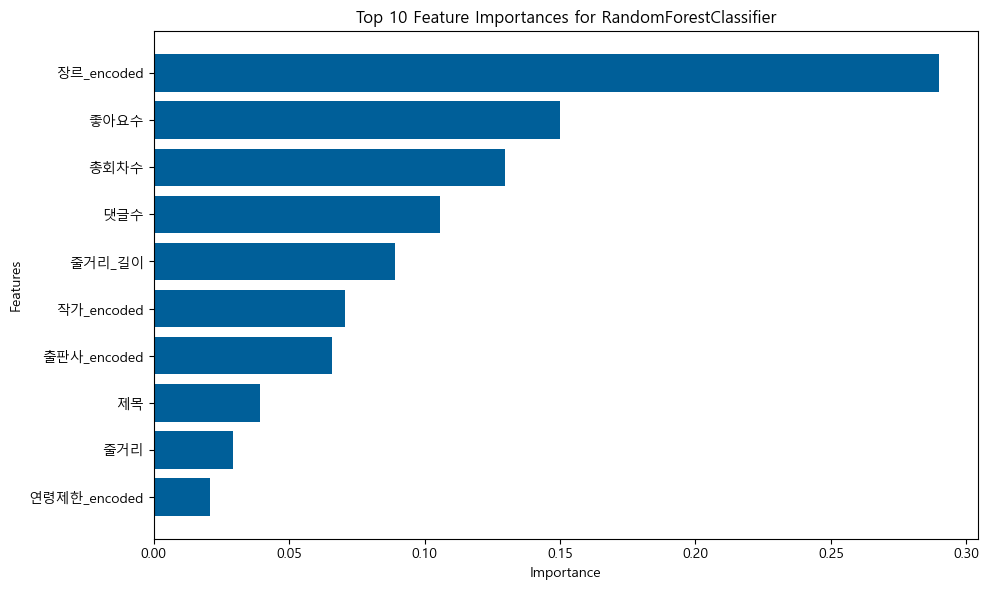

Training ExtraTreesClassifier...
Feature Importance for ExtraTreesClassifier:


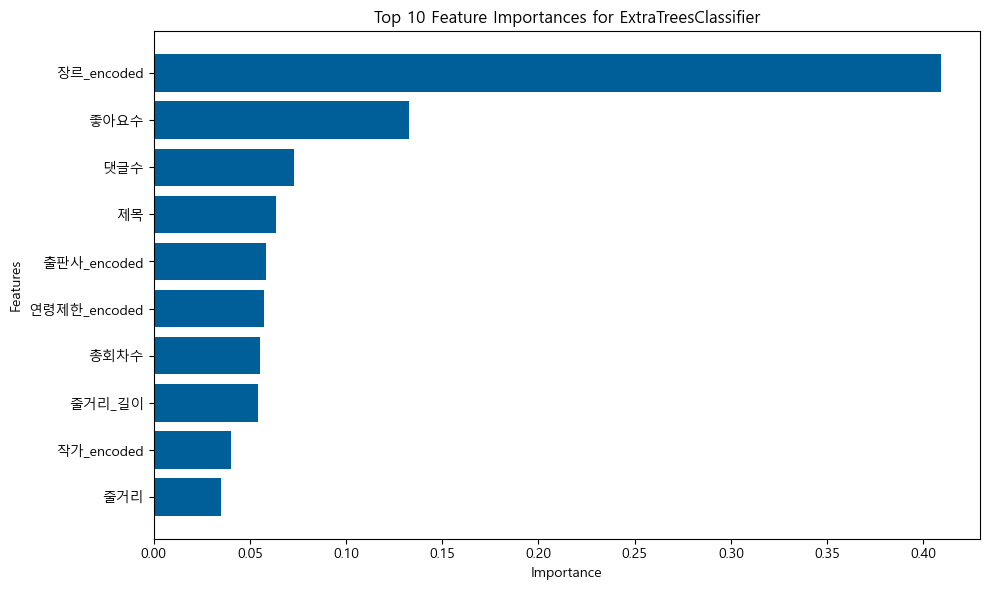

Training GradientBoostingClassifier...
Feature Importance for GradientBoostingClassifier:


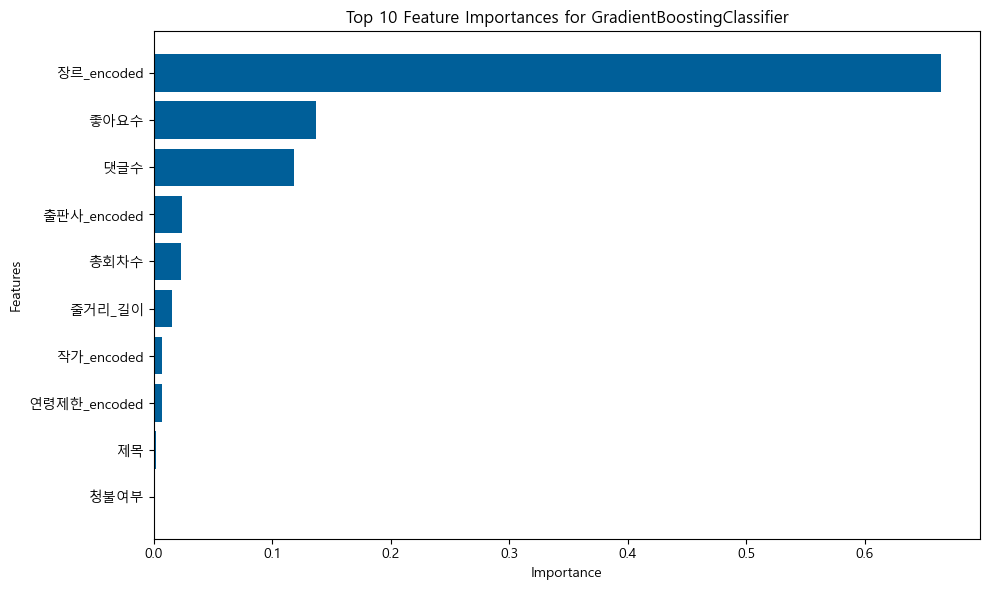

Training XGBClassifier...
Feature Importance for XGBClassifier:


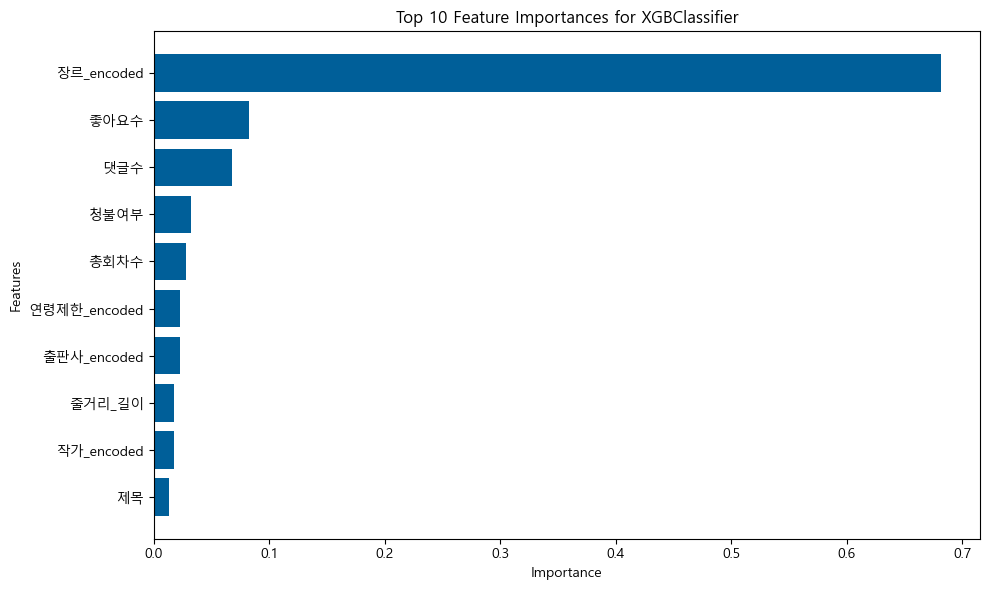

Training LGBMClassifier...
Feature Importance for LGBMClassifier:


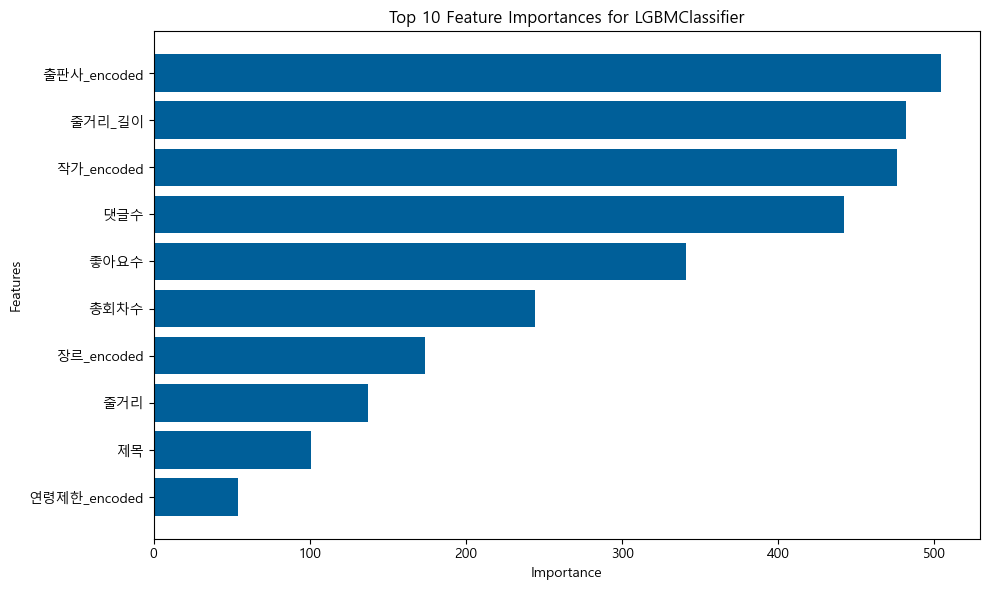

In [162]:
from matplotlib import pyplot as plt
import numpy as np

# 변수 중요도 시각화 함수 (상위 10개 특성만 출력)
def plot_top_feature_importances(model, feature_names, model_name, top_n=10):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]  # 중요도 순으로 정렬

        # 상위 top_n개 특성만 선택
        top_indices = indices[:top_n]
        top_importances = importances[top_indices]
        top_feature_names = [feature_names[i] for i in top_indices]

        plt.figure(figsize=(10, 6))
        plt.barh(top_feature_names, top_importances, align="center", color='#005f99')  # 진한 파란색
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.title(f"Top {top_n} Feature Importances for {model_name}")
        plt.gca().invert_yaxis()  # 중요한 특성이 위에 오도록
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not have feature_importances_ attribute.")

# 모델 학습 및 변수 중요도 시각화 (상위 10개 특성)
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # 모델 학습

    print(f"Feature Importance for {model_name}:")
    feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]
    plot_top_feature_importances(model, feature_names, model_name)





In [ ]:
# 실행안시킴..
models = [
    random_model,
    extra_model,
    gbm_model,
    xgb_model,
    lgbm_model
]

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
results = dict()

for alg in models:
    alg.fit(X_train, y_train)
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='accuracy')
    results[alg.__class__.__name__] = np.mean(score)*100
    print(alg, results[alg.__class__.__name__])